### Start with tensorflow

## 1. Load dataset

In [1]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

2025-11-25 15:45:15.778335: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-25 15:45:15.840492: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-25 15:45:18.146499: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [5]:
print(x_test.shape)
print('##########################')
print(y_test.shape)

(10000, 32, 32, 3)
##########################
(10000, 1)


In [6]:
print(x_train.shape)
print('##########################')
print(y_train.shape)

(50000, 32, 32, 3)
##########################
(50000, 1)


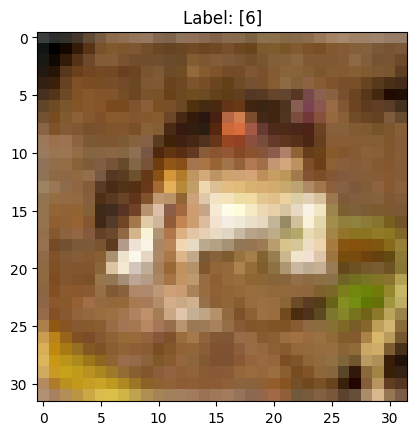

In [7]:
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0]}")
plt.show()


## 2. Preprocessing

Normalize pixel values

In [3]:
x_train = x_train / 255.0
x_test  = x_test  / 255.0


## 3. Create a validation set

You NEVER validate on the test set during training

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

## 4. Build the model 

In [6]:
model = models.Sequential([

    # 1️⃣ First Convolution Layer
    layers.Conv2D(
        32,                # number of filters (32 feature detectors)
        (3, 3),            # filter size (3x3 pixels)
        activation='relu', # activation function
        input_shape=(32, 32, 3)  # input image size (height, width, channels(RGB))
    ),

    # 2️⃣ First Max Pooling Layer
    layers.MaxPooling2D(
        (2, 2)             # reduces spatial size by 2 (downsampling)
    ),

    # 3️⃣ Second Convolution Layer
    layers.Conv2D(
        64,                # more filters → can learn more complex features
        (3, 3),
        activation='relu'
    ),

    # 4️⃣ Second Max Pooling Layer
    layers.MaxPooling2D(
        (2, 2)
    ),

    # 5️⃣ Third Convolution Layer
    layers.Conv2D(
        64,
        (3, 3),
        activation='relu'
    ),

    # 6️⃣ Flatten layer
    layers.Flatten(),     # converts 3D feature map into a 1D vector

    # 7️⃣ Fully connected Dense layer
    layers.Dense(
        64,                # number of neurons
        activation='relu'
    ),

    # 8️⃣ Output layer
    layers.Dense(
        10                 # 10 classes in CIFAR-10 (logits)
    )
])


## 5. Compile model

In [7]:
# Compile the CNN model
model.compile(
    optimizer='adam',   # Optimizer: Adam adjusts the learning rate automatically for faster/better training

    loss=tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True  # Since the last Dense layer has NO softmax, we tell Keras these are raw scores (logits)
    ),

    metrics=['accuracy'] # Track accuracy during training and evaluation
)

## 6. Train the model (REAL training step)

THIS is where the model actually learns

In [8]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_val, y_val)  # validation set to monitor overfitting
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.3454 - loss: 1.7638 - val_accuracy: 0.5280 - val_loss: 1.3128
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5585 - loss: 1.2473 - val_accuracy: 0.5999 - val_loss: 1.1590
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.6138 - loss: 1.0918 - val_accuracy: 0.6446 - val_loss: 1.0226
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.6582 - loss: 0.9708 - val_accuracy: 0.6660 - val_loss: 0.9575
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6941 - loss: 0.8764 - val_accuracy: 0.6678 - val_loss: 0.9592
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7232 - loss: 0.8075 - val_accuracy: 0.6884 - val_loss: 0.9119

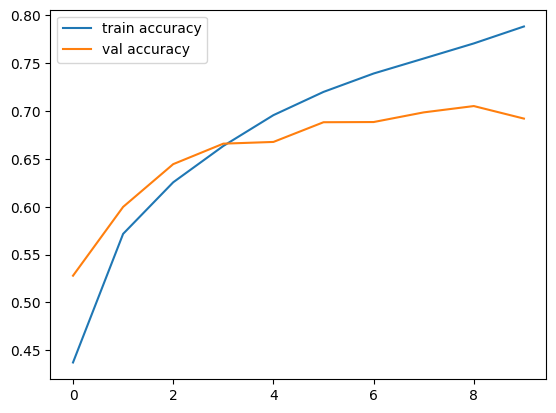

In [9]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


## 7. Evaluate the model on the test set

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Final Test Accuracy: {test_acc:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.6986 - loss: 0.9432
Final Test Accuracy: 0.6986


## 8. Test model on unseen images

In [11]:
from tensorflow.keras.preprocessing import image

In [12]:
img = image.load_img("car.jpg", target_size=(32, 32))
img_array = image.img_to_array(img)   # convert to (32,32,3)
img_array = img_array / 255.0         # normalize like CIFAR-10
img_array = np.expand_dims(img_array, axis=0)  # now shape = (1,32,32,3)

In [13]:
## predict now
pred = model.predict(img_array)
class_id = np.argmax(pred)
print("Predicted class:", class_id)

class_names = ["airplane", "car", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

print("Predicted class name:", class_names[class_id])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted class: 1
Predicted class name: car


### 3. CIFAR-10 class index mapping

CIFAR-10 labels:

0 = airplane

1 = automobile

2 = bird

3 = cat

4 = deer

5 = dog

6 = frog

7 = horse

8 = ship

9 = truck

## 9. Save the model for production

In [22]:
model.save("cifar10_cnn_model.h5")

## 10. Optional production features